In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize, constant_segmentation, interpolate_segments
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.graphics import plot_norm_qq, plot_paa_sax_symbols, plot_sax_symbols
from discretization.sax.symbol_mapping import IntervalNormMedian
from discretization.sax.one_d_sax import OneDSAX, compute_slopes
from discretization.sax.adaptive_sax import AdaptiveSAX

In [2]:
# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_orig_list = load_parquet_to_df_list(path)

# concatenate to one dataframe, because all time series have same length
df_orig = pd.concat([df["signal"] for df in df_orig_list], axis=1).iloc[:, :2]
df_norm = z_normalize(df_orig)

paa = PAA(window_size=8)
df_paa = paa.transform(df_norm)

sax = SAX(alphabet_size=4)
df_sax = sax.transform(df_paa)

df_paa_inv = paa.inv_transform(df_paa, df_orig.shape[0])

[QQ plot code is from here](https://github.com/axelroques/SAX/blob/16b4b721c0095a3f79392286ac6bc4d3d2a3c89a/sax/plot.py#L6)

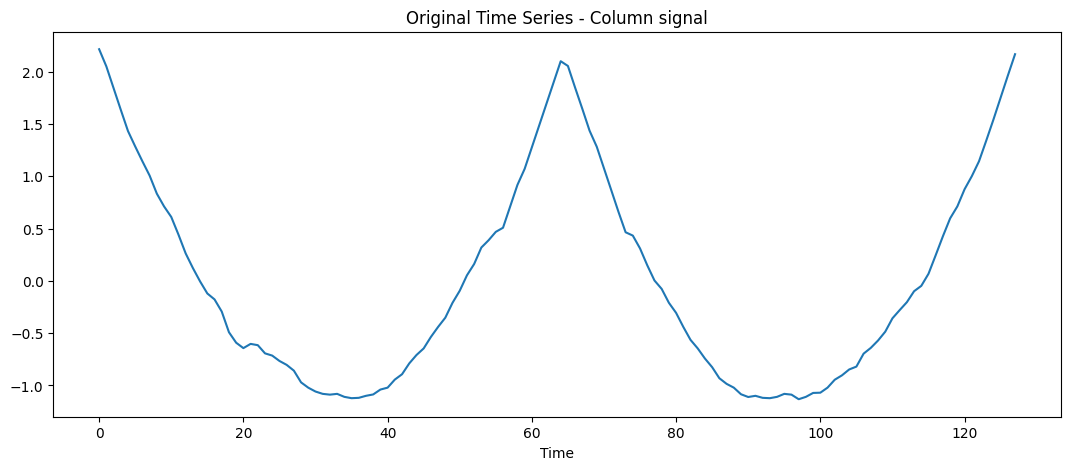

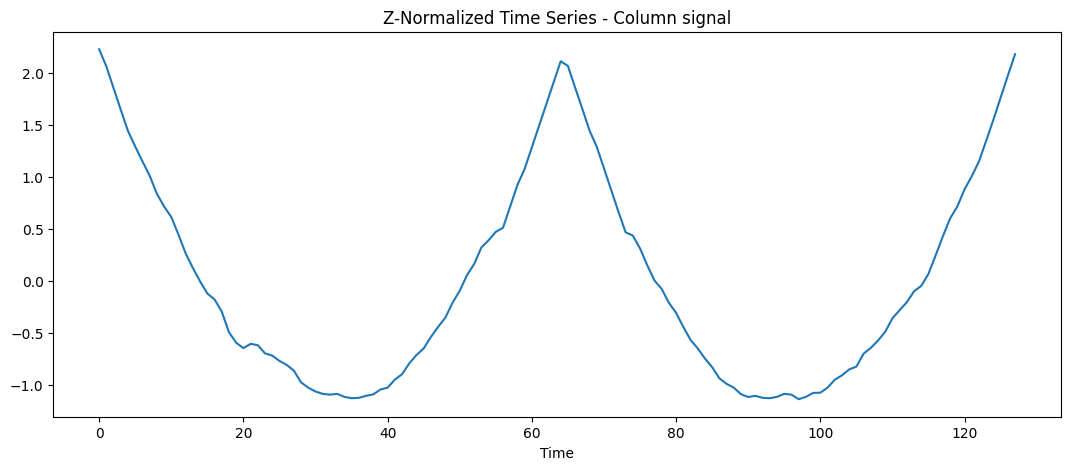

C:\Users\danie\Documents\Karlsruhe\03_KIT_Studium\07_Semester\Bachelorarbeit\Bachelorarbeit\Repo\implementation\venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


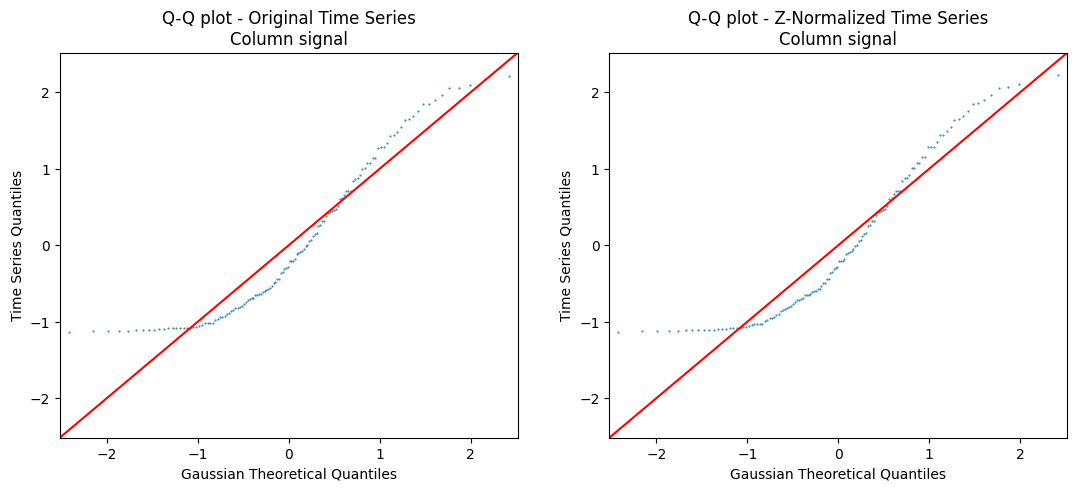

In [3]:
plot_norm_qq(df_orig, df_norm, 0, scale=1)

[plot PAA code is from here](https://github.com/axelroques/SAX/blob/16b4b721c0095a3f79392286ac6bc4d3d2a3c89a/sax/plot.py#L67)

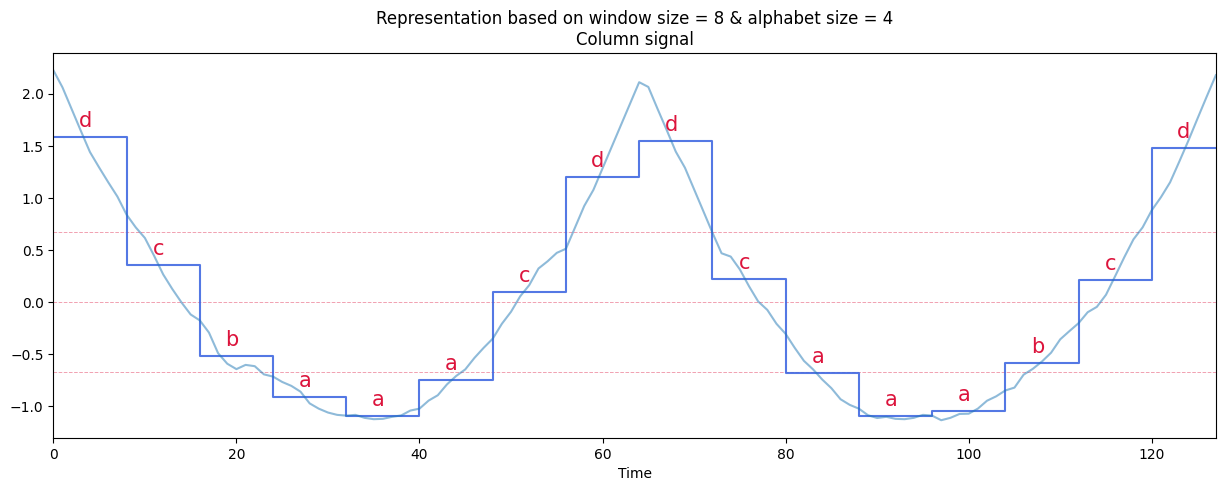

In [4]:
symbol_mapping = IntervalNormMedian(alphabet_size=sax.alphabet_size)
plot_paa_sax_symbols(df_norm, df_paa, df_sax, sax.breakpoints, sax.alphabet_size, paa.window_size, 0)

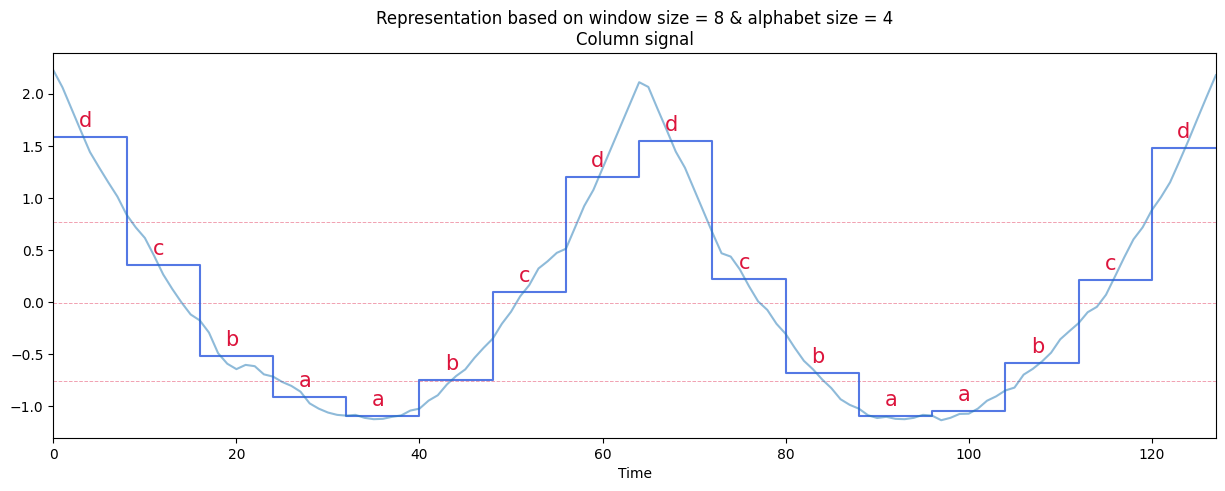

In [5]:
# Adaptive SAX
a_sax = AdaptiveSAX(alphabet_size=4)
df_a_sax, df_breakpoints = a_sax.transform(df_paa)
symbol_mapping = IntervalNormMedian(alphabet_size=a_sax.alphabet_size)
plot_paa_sax_symbols(df_norm, df_paa, df_a_sax, a_sax.breakpoints, a_sax.alphabet_size, paa.window_size, 0)

In [6]:
# 1d-SAX
# not usable for 1d-SAX, because segments are linear functions and not constant functions
one_d_sax = OneDSAX(alphabet_size_avg=8, alphabet_size_slope=8)
df_one_d_sax = one_d_sax.transform(df_paa, df_norm, paa.window_size)

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\one_d_sax.py:202: UserWarning: Make sure you have initialized the chosen 'symbol_mapping_slope' strategy with the variance of the Gaussian distribution that was used to determine the breakpoint intervals for the segment slopes.
  warnings.warn("Make sure you have initialized the chosen "


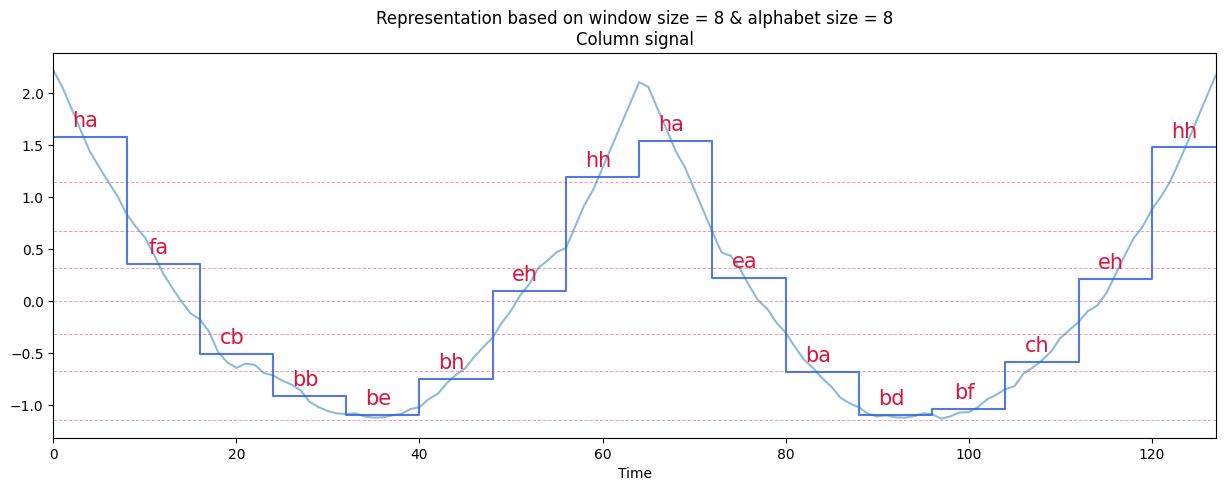

In [7]:
var = np.sqrt(0.03/paa.window_size)
symbol_mapping_avg = IntervalNormMedian(one_d_sax.alphabet_size_avg)
symbol_mapping_slope = IntervalNormMedian(one_d_sax.alphabet_size_slope, var=var)

df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_one_d_sax_inv

plot_paa_sax_symbols(df_norm, df_paa, df_one_d_sax, one_d_sax.breakpoints_avg, one_d_sax.alphabet_size_avg, paa.window_size, 0)

[plot SAX code is from here](https://github.com/axelroques/SAX/blob/16b4b721c0095a3f79392286ac6bc4d3d2a3c89a/sax/plot.py#L148)

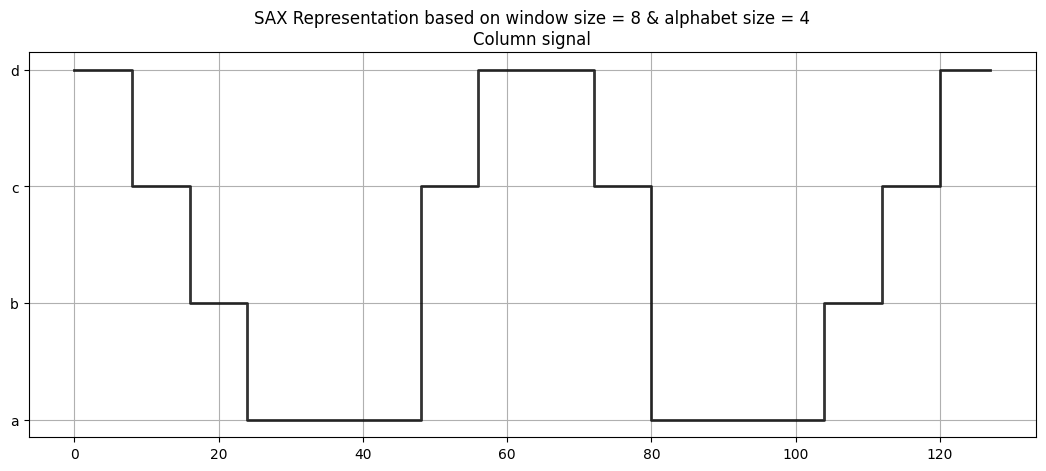

In [8]:
# SAX
plot_sax_symbols(df_norm, df_sax, sax.alphabet, paa.window_size, 0)

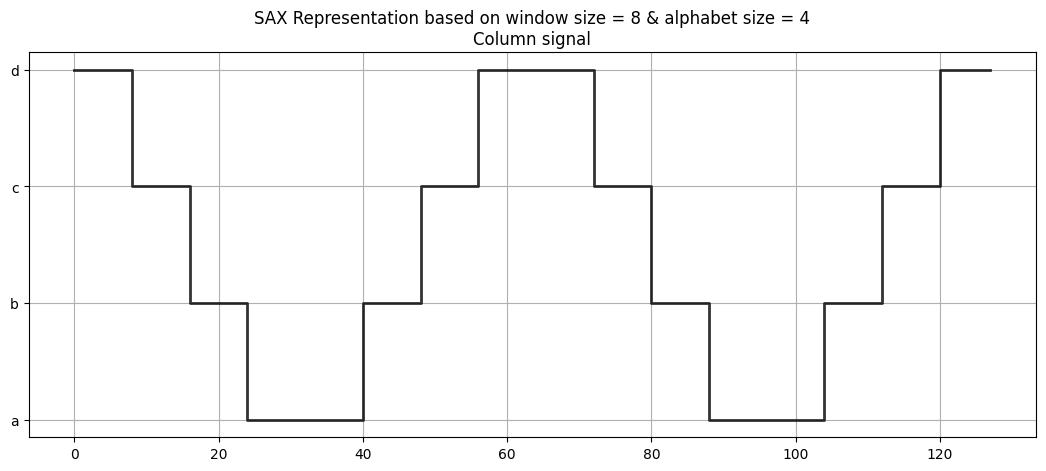

In [9]:
# Adaptive SAX
plot_sax_symbols(df_norm, df_a_sax, a_sax.alphabet, paa.window_size, 0)

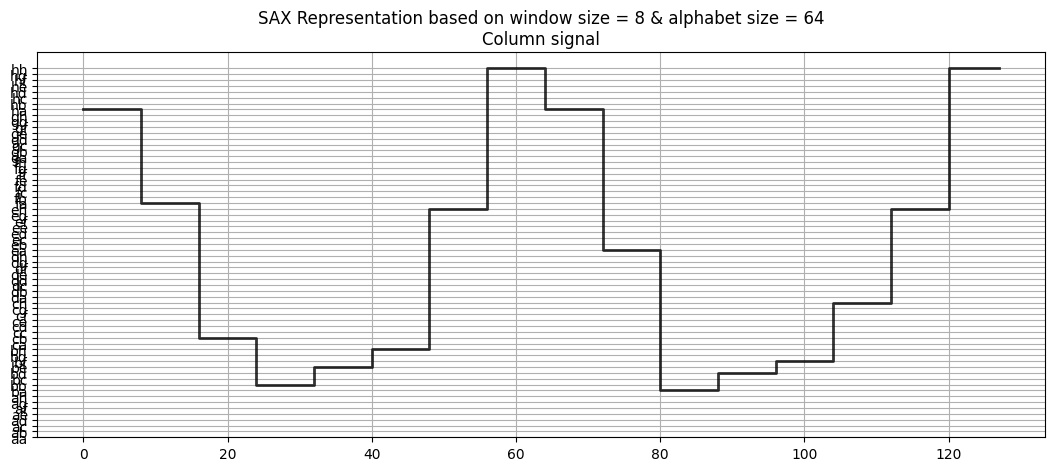

In [10]:
# 1d-SAX
plot_sax_symbols(df_norm, df_one_d_sax, one_d_sax.alphabet_avg, paa.window_size, 0, one_d_sax.alphabet_slope)